## Gradio Pets

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

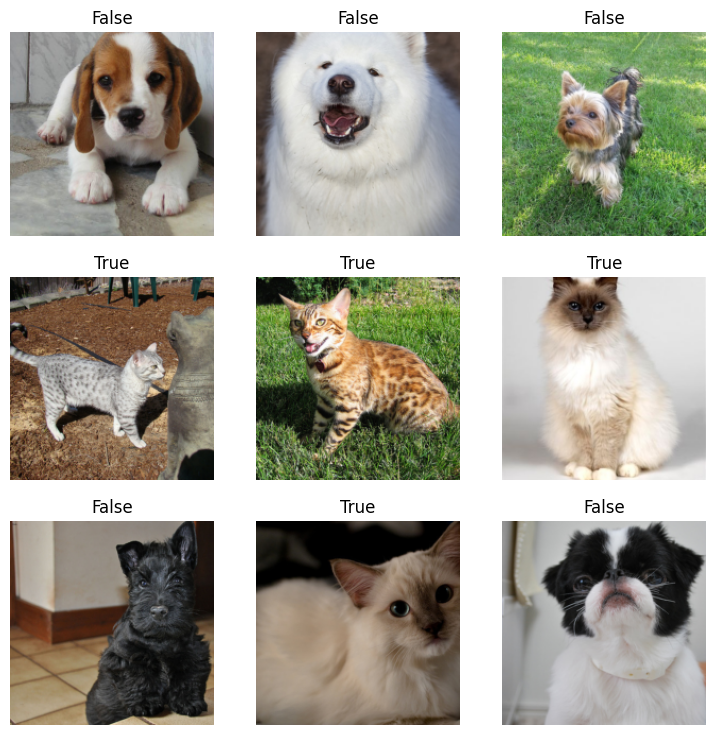

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 193MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.207770,0.044169,0.016915,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.082971,0.059573,0.018945,00:44
1,0.044252,0.018491,0.008119,00:45
2,0.017840,0.011738,0.004736,00:44


In [ ]:
learn.export('model.pkl')

# Make into gradio


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

demo = gr.Interface(fn=image_classifier, inputs="image", outputs="label")
demo.launch()

Old ver

In [ ]:
!pip install gradio==3.50

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.3 MB/s eta 0:00:00


In [ ]:
#/export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

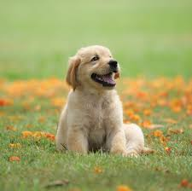

In [ ]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [ ]:
#/export
learn = load_learner('model.pkl')
learn.predict(im)

('False', tensor(0), tensor([9.9996e-01, 3.5038e-05]))

In [ ]:
#/export
categories = ('Dog', 'Cat')

def classify_images(img):
  pred, idx, probs = learn.predict(img)
  return dict(zip(categories, map(float, probs)))

In [ ]:
classify_images(im)

{'Dog': 0.9999649524688721, 'Cat': 3.503808329696767e-05}

In [ ]:
#/export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg']

intf = gr.Interface(fn=classify_images, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

<ipython-input-13-97fc3841e3c2>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
<ipython-input-13-97fc3841e3c2>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
<ipython-input-13-97fc3841e3c2>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
<ipython-input-13-97fc3841e3c2>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.50.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://29d1df29d642bebd07.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
